### DBSCAN: Density Based Spatial clustering of Application with Noise
- Density based algorithm
- **Density** means no. of points with in a specified radius r(eps).
- A point is a **core point** if it has atleast specific no. of points within radius eps.
- A point which has fewer than specified points within radius eps is called **border point** but it is the neighbourhood of a core point.
- A point which is not a core point or border point is called **noise point**.
- The user doesn't require to set the number of clusters a priori.
- Useful for **outlier detection** i.e, can identify points that are not part of any cluster.
- There are two parameters in DBSCAN: **min_samples** and **eps**
  - **eps:** the maximum distance between two samples for them to be clustered in the same neighbourhood (starts at eps= 0.1).
  - **min_samples:** the minimum number of samples in a neighbourhood for a data point to qualify as a core point (start with very low sample size).
<img src = './Image/17.1 Image a.png' width='60%' height='60%'/>
A **cluster** is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to core sample (but are themselves core samples).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.datasets.samples_generator import make_blobs

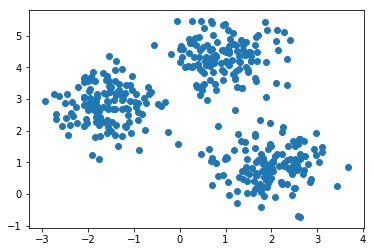

In [18]:
x, y= make_blobs(n_samples= 400, cluster_std= 0.6, centers=3, random_state= 0)
plt.scatter(x[:, 0], x[:, 1])

In [23]:
scaler= StandardScaler()
x_sc= scaler.fit_transform(x)

In [27]:
dbscan= DBSCAN(eps= 0.3, metric= 'euclidean', min_samples= 10)
clusters= dbscan.fit_predict(x_sc)

In [28]:
dbscan.labels_

array([ 0,  0,  1,  1,  1,  2,  2,  0,  0,  2,  1,  0,  1,  0,  1,  1,  2,
        2,  1,  2,  0,  0,  1,  0,  0,  2,  0,  2,  1,  1,  2,  0, -1,  2,
        0,  2,  1,  1,  2,  0, -1,  2,  2,  0,  1,  1, -1,  2,  1,  0,  0,
        1,  2,  1, -1,  1,  0,  1,  0,  2,  1,  2,  0,  2,  0,  0, -1,  0,
        1,  1,  2,  2,  0,  0,  1,  0,  2,  1,  2,  1,  1,  0,  2,  0,  2,
        1,  0,  2,  2,  1,  1, -1, -1,  0,  1, -1,  1,  0,  0,  1,  2,  2,
        2,  0,  2,  1,  2,  2,  0,  2,  2,  0,  0,  0, -1,  0,  1,  0,  0,
        2,  2,  1, -1,  2,  1,  0,  2, -1,  2,  2,  0,  1,  2,  0,  1,  0,
        2,  1,  0,  0,  0,  2,  0,  1,  2,  1,  2,  2,  1,  2,  1,  0,  0,
        1,  0,  0,  2,  1,  0,  0,  0,  2,  0,  2,  0,  2,  0,  0,  0,  2,
        2,  0,  1,  2,  1,  0,  1, -1, -1,  0,  2,  2,  1,  1,  2,  1,  1,
        0,  2,  0,  0,  2,  2,  1,  1,  0,  1,  2,  0,  1,  2,  0,  1,  0,
        1,  1,  2,  2, -1,  1,  1,  0,  1,  0,  2,  1,  0,  0,  2,  2,  2,
        0,  1,  0,  1,  2

Text(0.5, 1.0, 'eps= 0.3, min samples= 10')

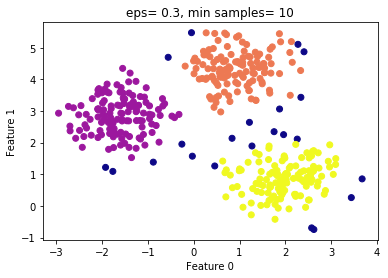

In [29]:
plt.scatter(x[:, 0], x[:, 1], c= dbscan.labels_, cmap='plasma')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title(f'eps= {dbscan.eps}, min samples= {dbscan.min_samples}')

**Parameters eps:**

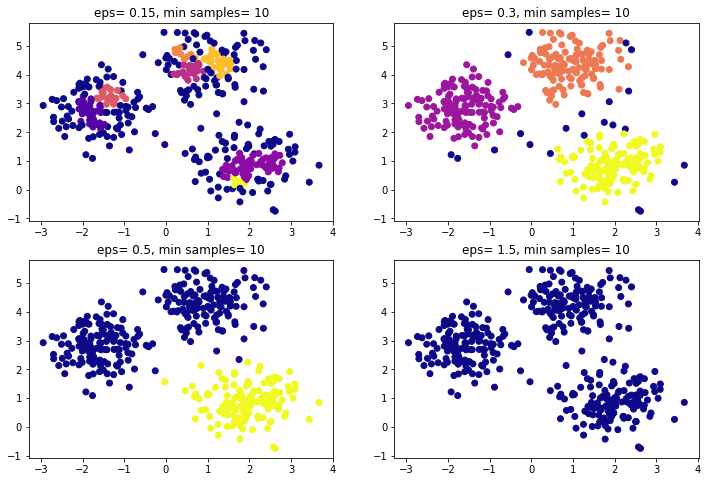

In [30]:
plt.figure(figsize= (12,8))
for i, k in enumerate ([.15, .3, .5, 1.5], start= 1):
    plt.subplot(2,2,i)
    db= DBSCAN(eps= k, metric= 'euclidean', min_samples= 10)
    db.fit(x_sc)
    
    plt.scatter(x[:, 0], x[:, 1], c= db.labels_, cmap='plasma')
    plt.title(f'eps= {db.eps}, min samples= {db.min_samples}')

The parameter eps contols the local neighbourhood of the points.
- when chosen **too small**, most data will not be clustered at all (and labeled as -1 for noise)
- when chosen **too high**, it causes close clusters to be merged into one cluster and eventually the entire data set to be returned as single cluster.

**Parameter min_samples:**

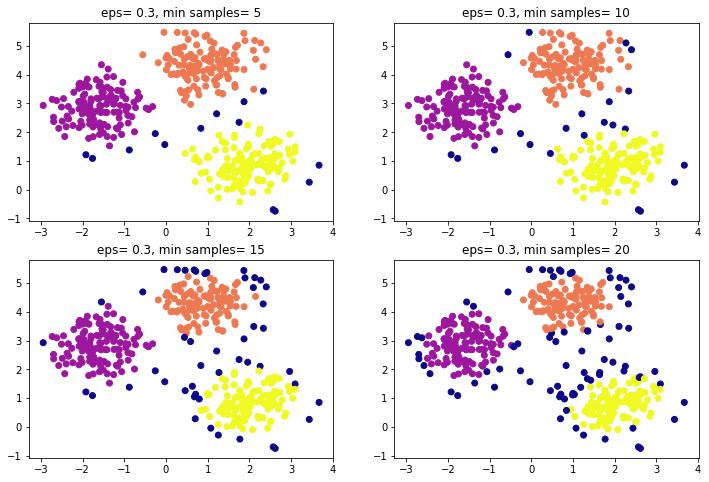

In [31]:
plt.figure(figsize= (12,8))
for i, k in enumerate ([5, 10, 15, 20], start= 1):
    plt.subplot(2,2,i)
    db= DBSCAN(eps= .3, metric= 'euclidean', min_samples= k)
    db.fit(x_sc)
    
    plt.scatter(x[:, 0], x[:, 1], c= db.labels_, cmap='plasma')
    plt.title(f'eps= {db.eps}, min samples= {db.min_samples}')